In [2]:
from pathlib import Path
import sys
scripts_dir = Path("/hetghome/antonpr/xmax_sigma/flincpy/scripts_01")
sys.path.insert(0, str(scripts_dir/"mceq_2d"))

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
from mceq2d_dists import MCEQDist2D, CalcMCEqHists
from mceq2d_ihank import MCEqIHankel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
mceq_sol = MCEQDist2D(
                 energy = 100,
                 pdg_id = 2212,
                 theta_deg = 30,
                 slant_depths = [143, 647, 1033],
                 energy_range = [1e-1, 1e4],
                 interaction_model = "EPOS-LHC", 
                 hybrid_crossover = 0.1,
                 density_model = ("CORSIKA", ("USStd", None)))

MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


100%|██████████| 2559/2559 [00:18<00:00, 136.28it/s]


In [15]:
mceq_hankel = MCEqIHankel(mceq_sol.mceq_run)

In [16]:
k_grid, hankel_amp_part, theta_grid, theta_distr_part = mceq_hankel.ihankel([(14, 0), (-14, 0)])

In [17]:
theta_distr_part[0].shape

(3, 1024, 51)

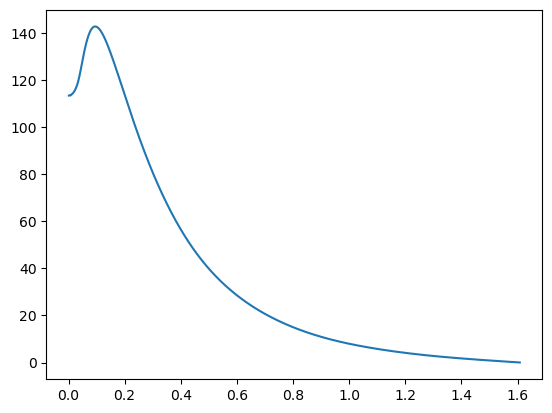

In [18]:
plt.plot(theta_grid, theta_distr_part[0][0, :, 0])